# Audio Processing

In this livecode we will both generate sound waves & analyze `.wav` files on the hard drive.

The goal is to understand how a sound is encoded in numbers, the same way images or videos are, as well as basically anything a computer manipulates.

In [ ]:
!pip install scipy --quiet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio

## Sound Synthesis

Before we generate sound from scratch, let's see how the computer records sound from a microphone:

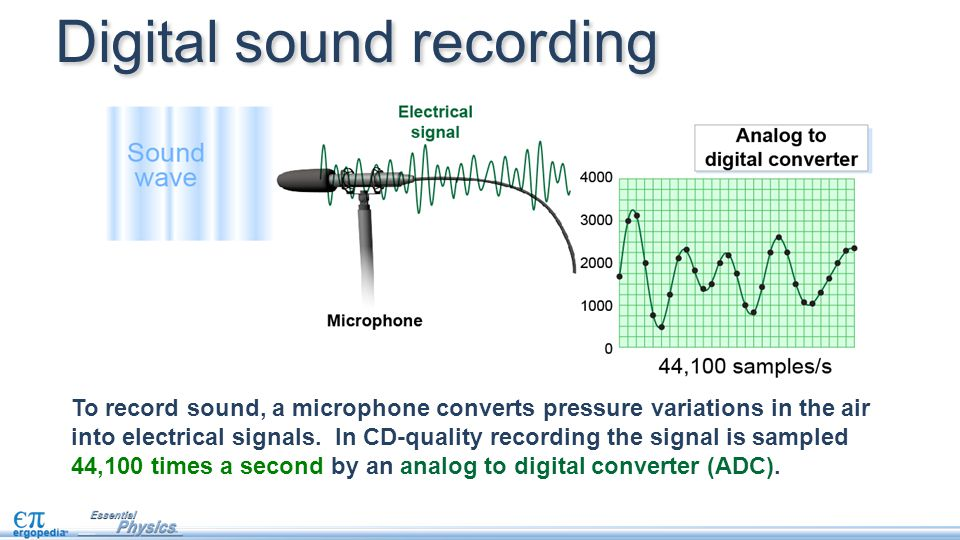

In [4]:
R = 44100 # Sampling rate
D = 3     # Duration of the sound

❓ Write a `note(f)` function which takes a frequency $f$ (in Hz) and generate a sinusoide signal with sampling rate `R` and duration `D` (constants).

<details>
    <summary>💡 <strong>Hint</strong> </summary>
    
A single-frequency sound wave with frequency $f$ and maximum amplitude $A$ is represented by the sine function:

$$y(t)=A \times sin(2 \pi f t)$$

where $t$ is time and $y(t)$ is the amplitude of the sound wave at time $t$.

You can consider for now that the maximum amplitude $A$ is `1`.

Remember, you can generate a big list of numbers using [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
</details>

In [12]:
def note(f):
    
    t = np.linspace(0, D, R*D)
    y = np.sin(2 * np.pi * f * t)
    
    return y


❓ Plot the output of `note(f)` for `440 Hz`. For `1Hz`. What do you see?

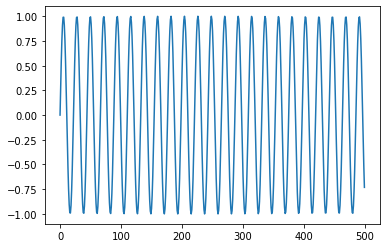

In [22]:
plt.plot(note(2000)[0:500]);

❓ Call the `note` function to generate an `A` (440 Hz) from the diapason. Play it.

<details>
    <summary>💡 <strong>Hint</strong></summary>

Use [`Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) from `IPython.display` already imported in the notebook at the first cell)
</details>

In [27]:
base_note = note(440)
Audio(data,rate=R)


❓ Try and layer several notes, like `A` + the perfect fifth, major (or minor) third, etc into a `chord` variable. Play it!

<details>
    <summary>💡 <strong>Hint</strong></summary>
    
Check out the [Frequency Ratio](https://en.wikipedia.org/wiki/Interval_(music)#Frequency_ratios) on Wikipedia. For instance, the perfect fifth has a $\frac{3}{2}$ ratio
</details>

In [31]:
base_note = note(440)
fifth_note = note(440 * 3/2)
major_third = note(440 * 5/4)

chord = base_note + 0.5 * fifth_note + 0.25 * major_third

Audio(chord, rate = R)

❓ Plot the first `1000` samples of the chord

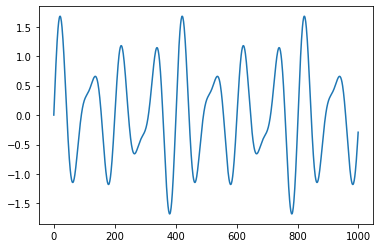

In [34]:
plt.plot(chord[0:1000]);

## [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

> Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 
> **Wikipedia**

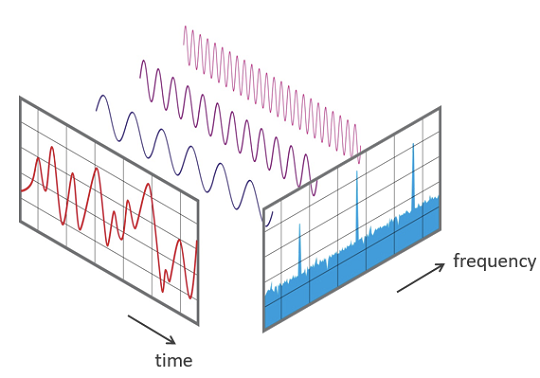

Let's use [`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) to analyze the signals we built above.

Run the following code. Change the `chord` above, and replot it. What do you see?

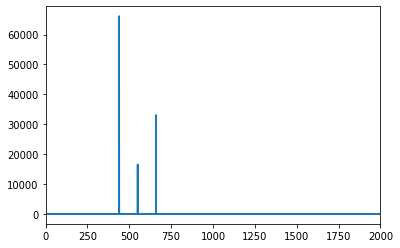

In [38]:
import scipy.fft
def plot_fft(signal, rate, freq_max):
    Y = np.abs(scipy.fft.fft(signal))
    X = np.abs(scipy.fft.fftfreq(Y.size) * rate)
    plt.xlim(0, freq_max)
    plt.plot(X, Y)
    
plot_fft(chord, R, 2000)

## Real-life samples

Let's perform `fft` on the `.wav` files in the folder:

In [39]:
!ls -lh *.wav

-rw-r--r-- 1 nandosoq nandosoq 506K Jul 19 15:17 bird.wav
-rw-r--r-- 1 nandosoq nandosoq 379K Jul 19 15:17 blissful_bell.wav
-rw-r--r-- 1 nandosoq nandosoq 400K Jul 19 15:17 guitar_G.wav
-rw-r--r-- 1 nandosoq nandosoq 266K Jul 19 15:17 piano_F.wav
-rw-r--r-- 1 nandosoq nandosoq 100K Jul 19 15:17 snare_80s.wav


Let's load the audio of `bird.wav` and visualize the sound **waveform**

In [64]:
rate, audio = wavfile.read("bird.wav")
audio.T[0][R:(R+10)]

array([-396, -616, -699, -663, -531, -339, -138,   25,  126,  166],
      dtype=int16)

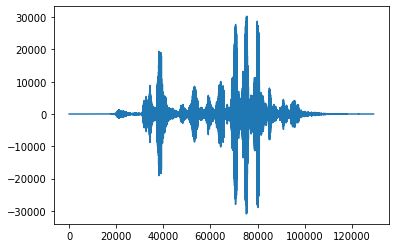

In [41]:
rate, audio = wavfile.read("bird.wav")
plt.plot(audio.T[0])

Now let's apply and plot the FFT of that signal & play it

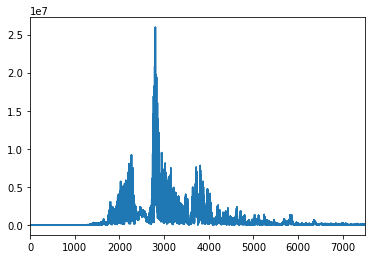

In [42]:
plot_fft(audio.T[0], rate, 7500)
Audio(audio.T[0], rate=rate)

---

Awesome! 

❓ Now it's your turn: try to reproduce that analysis with the other sounds (cf `!ls -lh *.wav` cell above)

In [57]:
s_wav = 'guitar_G.wav'

In [70]:
rate, audio = wavfile.read(s_wav)
audio[R:(R+1)]

array([6007], dtype=int16)

In [59]:
rate, audio = wavfile.read(s_wav)
audio.T[0][R:(R+1)]

IndexError: invalid index to scalar variable.

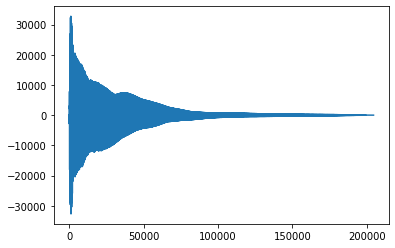

In [71]:
rate, audio = wavfile.read(s_wav)
plt.plot(audio.T);

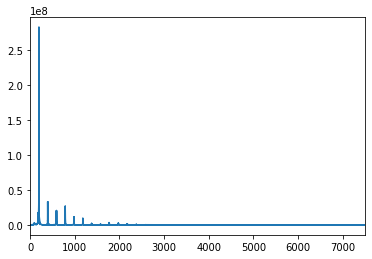

In [72]:
plot_fft(audio.T, rate, 7500)
Audio(audio.T, rate=rate)